## Spectral centroid versus duration
The duration of the sound clips ranges from 0.5 sec to 3.65 sec. 

In [52]:
sounds = {}

In [53]:
for zscore in range(13):
    sounds[zscore] = {}
    
    types = ["LFO", "ROS", "SAW"]
    for method in types: 
        for num in range(10):
            name = method + str(num)
            
            sounds[zscore][name] = []

___
** SC, duration, numOnsets, strength onsets **

In [10]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from __future__ import division

In [11]:
import wave
import contextlib
import spectral_centroid as scentroid

In [12]:
from scipy.signal import hilbert

In [13]:
from scipy.io import wavfile
from librosa import onset

### Getting information on all the sounds

Getting the mean spectral centroid of each of the sound files and the length of each sound

In [15]:
cwd = os.getcwd()

In [54]:
sc = []
dur = []

In [55]:
for i in range(13):
    sc_dir = os.path.join(cwd, "sounds", str(i))
    print i

    for method in os.listdir(sc_dir):
        sound_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(sound_method)
            continue
            
        for num in range(10):
            sound_file = os.path.join(sound_method, method + str(num))
            
            if sound_file == ".DS_Store" + str(num):
                os.remove(os.path.join(sound_method, ".DS_Store"))
                continue
            
            spec = scentroid.mean_sc_for_file(sound_file)
            with contextlib.closing(wave.open(sound_file,'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)

                
            sounds[i][method + str(num)].append(spec)
            sounds[i][method + str(num)].append(duration)
            
            dur.append(duration)
            sc.append(spec)

0
1
2
3
4
5
6
7
8
9
10
11
12


### Plotting

Plotting spectral centroid versus sound duration

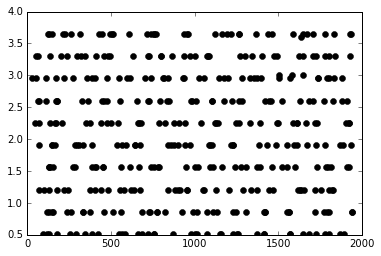

In [56]:
plt.plot(sc, dur, 'ko')

### Covariance matrix

In [57]:
cov_data = np.array([sc, dur])

In [58]:
np.corrcoef(cov_data)

array([[  1.00000000e+00,  -7.23000596e-04],
       [ -7.23000596e-04,   1.00000000e+00]])

## Spectral centroid versus amplitude envelope

In [59]:
num_onsets = []
onset_strength = []

In [60]:
for i in range(13):
    sc_dir = os.path.join(cwd, "sounds", str(i))
    print i

    for method in os.listdir(sc_dir):
        sound_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(sound_method)
            continue
            
        for num in range(10):
            sound_file = os.path.join(sound_method, method + str(num))
            
            if sound_file == ".DS_Store" + str(num):
                os.remove(os.path.join(sound_method, ".DS_Store"))
                continue
            
            audio_ts = wavfile.read(sound_file)

            onset_data = onset.onset_detect(audio_ts[1], audio_ts[0])
            mean_strength = np.mean(onset.onset_strength(audio_ts[1], 
                                                          audio_ts[0]))

            
            
            sounds[i][method + str(num)].append(len(onset_data))
            sounds[i][method + str(num)].append(mean_strength)
            
            num_onsets.append(len(onset_data))
            onset_strength.append(mean_strength)
            
print len(num_onsets)
print (len(sc))
        

0
1
2
3
4
5
6
7
8
9
10
11
12
390
390


### Plotting

**Spectral centroid versus number of onsets**

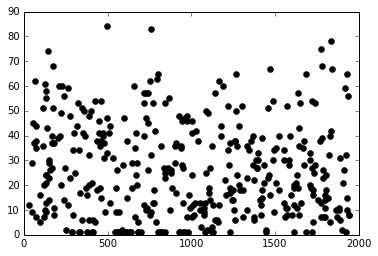

In [61]:
plt.plot(sc, num_onsets, 'ko')

**Spectral centroid versus mean onset strength**

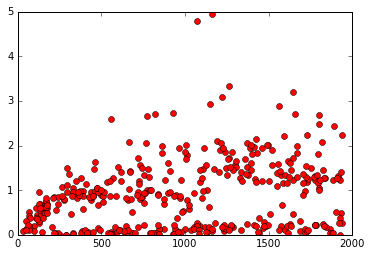

In [62]:
plt.plot(sc, onset_strength, 'ro')

### Covariance matrix

Spectral centroid vs number of onsets vs mean onset strength

In [63]:
cov_data = np.array([sc, dur, num_onsets, onset_strength])

In [64]:
np.corrcoef(cov_data)

array([[  1.00000000e+00,  -7.23000596e-04,  -7.39016953e-02,
          2.58281914e-01],
       [ -7.23000596e-04,   1.00000000e+00,   6.69086174e-01,
         -4.94550201e-02],
       [ -7.39016953e-02,   6.69086174e-01,   1.00000000e+00,
          1.30895496e-01],
       [  2.58281914e-01,  -4.94550201e-02,   1.30895496e-01,
          1.00000000e+00]])

In [65]:
sounds

{0: {'LFO0': [118.31471793472467, 0.5050340136054422, 7, 0.43590330515654702],
  'LFO1': [127.6833617745268, 0.8533333333333334, 10, 0.25357525601614667],
  'LFO2': [98.003414785287262, 1.2016326530612245, 16, 0.20522954368029098],
  'LFO3': [130.86630908606551, 1.555736961451247, 24, 0.31676384717006717],
  'LFO4': [68.997521706789797, 1.9040362811791383, 35, 0.52137106254580423],
  'LFO5': [137.77851939775735, 2.2523356009070294, 43, 0.47224941749692428],
  'LFO6': [70.423882235640249, 2.6006349206349206, 44, 0.18872133173717673],
  'LFO7': [112.37223862061572, 2.9547392290249435, 51, 0.37227536993390198],
  'LFO8': [65.891719637645181, 3.3030385487528346, 62, 0.43048532060211342],
  'LFO9': [146.21378662608979, 3.651337868480726, 74, 0.59793496889685072],
  'ROS0': [131.91109878048493, 0.5050340136054422, 9, 0.68022683062547018],
  'ROS1': [148.61437640516166, 0.8533333333333334, 14, 0.63028378008278718],
  'ROS2': [130.59353080189544, 1.2016326530612245, 21, 0.65203529753463685],
 

In [66]:
import json

In [68]:
soundParameters = os.path.join(os.path.dirname(cwd), "DATA", "soundParameters.json")

In [70]:
with open(soundParameters, 'w') as f:
            json.dump(sounds, f, sort_keys=True, indent=4)